C:\Users\itzgo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
20/20 [==============================] - 4s 91ms/step - loss: 23.0968 - accuracy: 0.5352 - val_loss: 1.5415 - val_accuracy: 0.9006
Epoch 2/10
20/20 [==============================] - 1s 55ms/step - loss: 4.0041 - accuracy: 0.7412 - val_loss: 13.3292 - val_accuracy: 0.6608
Epoch 3/10
20/20 [==============================] - 0s 16ms/step - loss: 3.0058 - accuracy: 0.7487 - val_loss: 0.6463 - val_accuracy: 0.8363
Epoch 4/10
20/20 [==============================] - 0s 9ms/step - loss: 1.5135 - accuracy: 0.8065 - val_loss: 1.1756 - val_accuracy: 0.7251
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 0.8337 - accuracy: 0.8467 - val_loss: 1.7734 - val_accuracy: 0.8363
Epoch 6/10
20/20 [==============================] - 0s 9ms/step - loss: 1.2551 - accuracy: 0.8593 - val_loss: 0.9196 - val_accuracy: 0.8889
Epoch 7/10
20/20 [==============================] - 0s 9ms/step - loss: 0.3177 - accuracy: 0.8945 - val_loss: 0.3524 - val_accuracy: 0.9181
Epoch 8/10
20/2

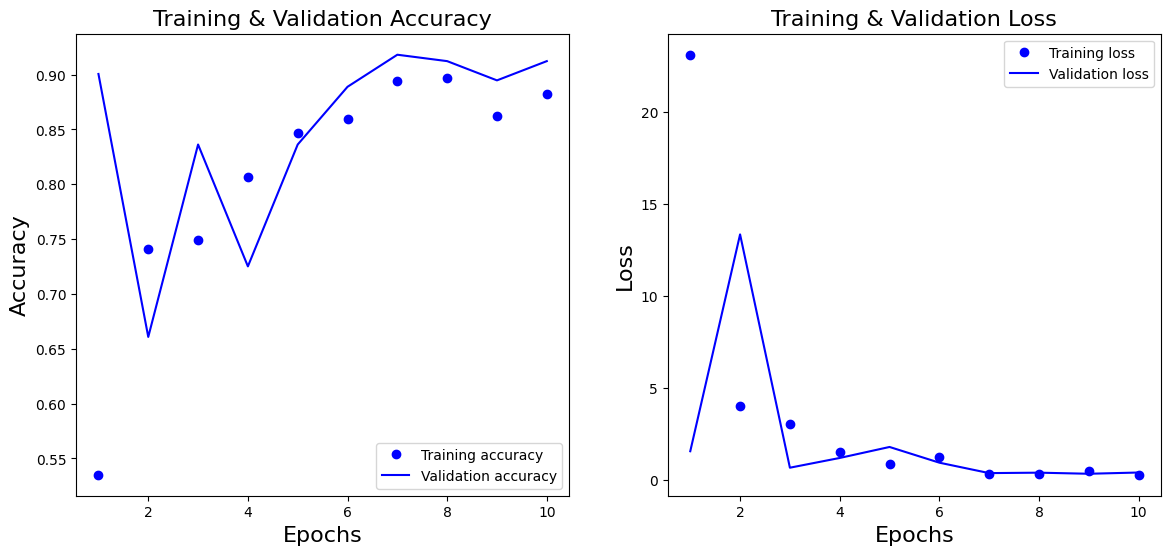

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import optimizers

#
# Load Sklearn Breast Cancer Dataset
#
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
#
# Set up the network
#
network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(30,)))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
#
# Configure the network with optimizer, loss function and accuracy
#
network.compile(optimizer=optimizers.RMSprop(lr=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
#
# Fit the network
#
history = network.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=20)

 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()